##**Data analysis of Flipkart Ecommerce Data:-**

##**Objectives:-**
1. What is the structure of the dataset? Are there any missing entries, duplicate records, or NaN values?
2. Does the data require preprocessing? Should we adjust date and time formats or improve the categorization?
3. During which months or years do we observe the highest sales figures?
4. Which product categories generate the largest volume of sales?
5. Which categories offer the highest discount percentages?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project/flipkart analysis/flipkart-ecommerce DATA.csv')
df.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
#shape of data
df.shape

(20000, 15)

##Looking Null & Duplicate values:-

In [ ]:
#missing data
df.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,78
discounted_price,78
image,3
is_FK_Advantage_product,0


####Ploting heatmap for looking missing value column byes:-

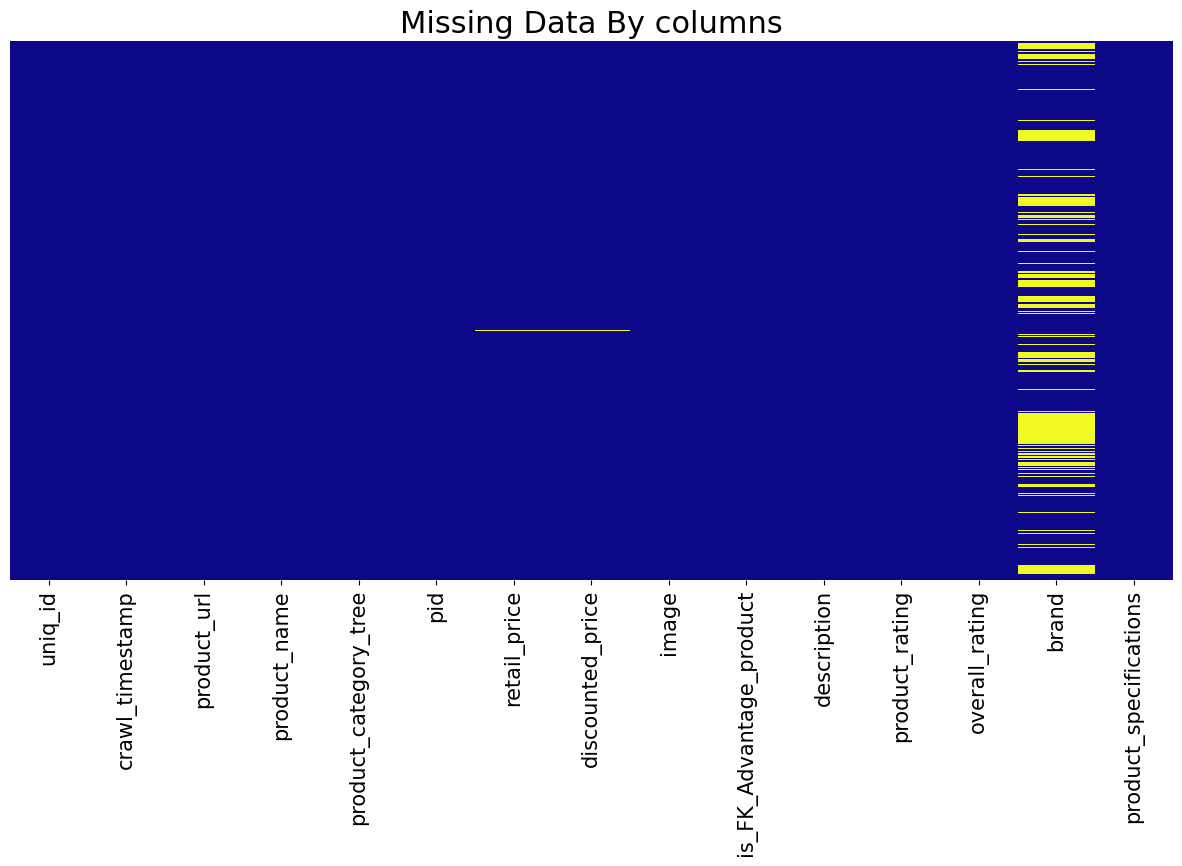

In [ ]:
#heatmap for looking missing value:-
plt.figure(figsize = (15,7))
sns.heatmap(df.isnull(), cmap='plasma', yticklabels=False, cbar=False)
plt.title('Missing Data By columns',fontsize=22)
plt.xticks(fontsize=15)
plt.show()

There are so many missing data in brand columns

In [ ]:
#looking for duplicate data:-
df.duplicated().value_counts()

,count
False,20000


There is no any duplicates value in dataset

In [ ]:
#looking for datatypes of each columns:-
df.dtypes

,0
uniq_id,object
crawl_timestamp,object
product_url,object
product_name,object
product_category_tree,object
pid,object
retail_price,float64
discounted_price,float64
image,object
is_FK_Advantage_product,bool


####crawl_timestamp is object datatype, now I am changing it into datetime datatypes:-

In [ ]:

df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])
df['crawl_timestamp'].dtypes

datetime64[ns, UTC]

####Extrcting month, year as a new column from crawl_timestap column:-

In [ ]:
df['year'] = df['crawl_timestamp'].apply(lambda x: x.year)
df['month'] = df['crawl_timestamp'].apply(lambda x: x.strftime('%B'))

df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,year,month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,March
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,March


###Seperating main catergory from Product_category_tree columns

In [ ]:
print(df.product_category_tree[2])

["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]


In [ ]:
print(df.product_category_tree[2])

for i in df.product_category_tree[2].split('>>'):
    print(i)

["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]
["Footwear 
 Women's Footwear 
 Ballerinas 
 AW Bellies"]


In [ ]:
df.product_category_tree[2].split('>>')[2][1:-1]

'Ballerinas'

In [ ]:
df['MainCategory'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:-1])

In [ ]:
df['MainCategory'][2]

'Footwear'

In [ ]:
#The following functions will be applied to the DataFrame using .apply(). They will extract the second, third, and fourth elements from the product_category_tree.
#Try-except blocks are included to handle potential index errors in cases where these elements are absent from the product_category_tree.
def get_secondary(x):
    try:
        return x.split('>>')[1].strip()
    except IndexError:
        return 'None'

def get_tertiary(x):
    try:
        return x.split('>>')[2].strip()
    except IndexError:
        return 'None'

def get_quaternary(x):
    try:
        return x.split('>>')[3].strip()
    except IndexError:
        return 'None'


In [ ]:
df['SecondaryCategory'] = df['product_category_tree'].apply(get_secondary)
df['TertiaryCategory'] = df['product_category_tree'].apply(get_tertiary)
df['QuaternaryCategory'] = df['product_category_tree'].apply(get_quaternary)

In [ ]:
df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,year,month,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,March,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,March,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...


##**Analyzing sales**

####**NO. of Sales per Month**

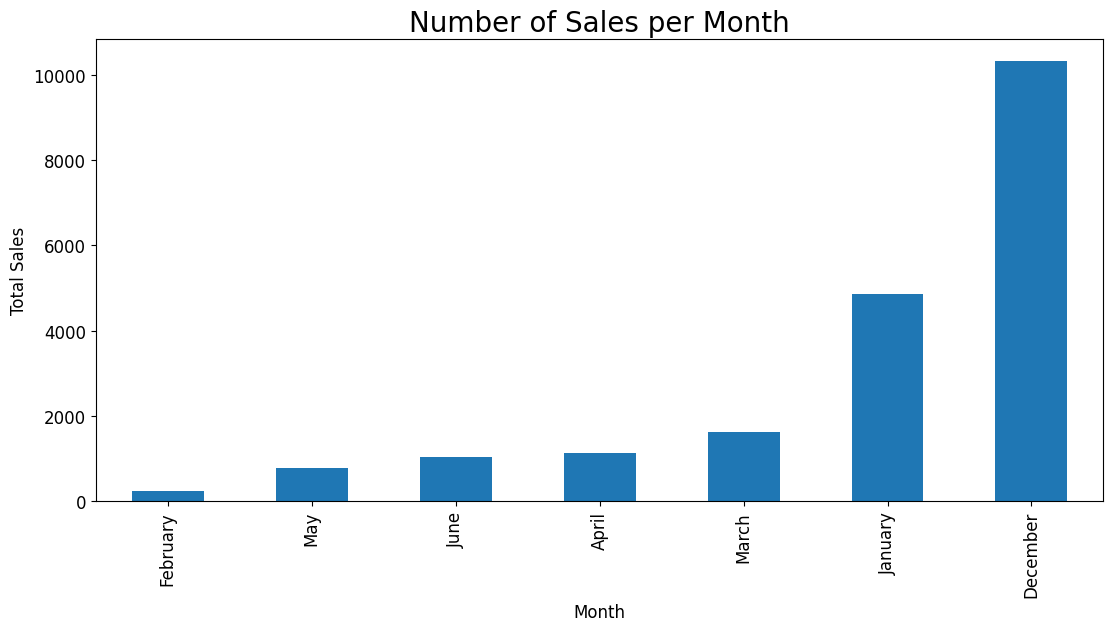

month
April        1137
December    10315
February      245
January      4850
June         1046
March        1634
May           773
Name: month, dtype: int64


In [ ]:
# Set up a larger figure size
plt.figure(figsize=(13, 6))

df['month'].value_counts(ascending=True).plot.bar()

plt.title('Number of Sales per Month', fontsize=20)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Display the count of sales for each month
print(df['month'].groupby(df['month']).count())


Here, We can also see data is missing for july to november

###**Sales count by year**

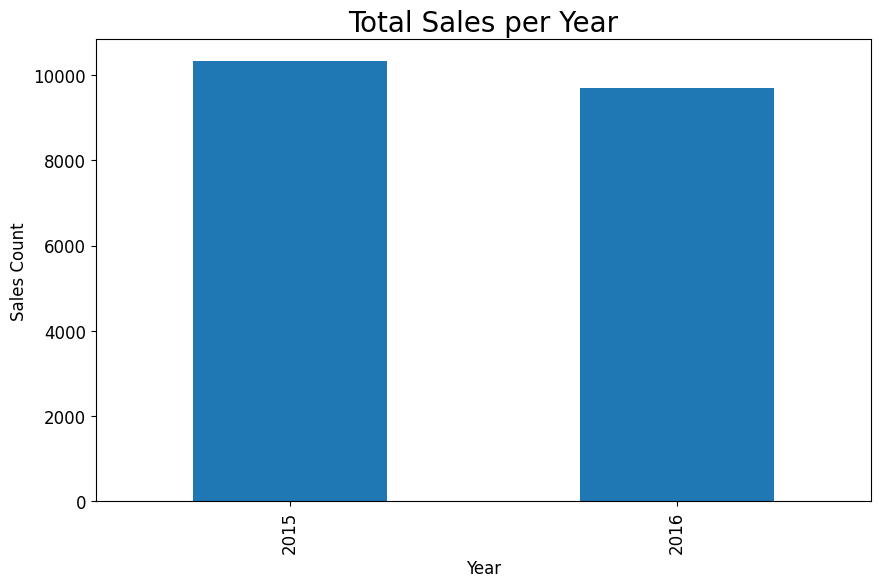

year
2015    10315
2016     9685
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))

#create a bar plot showing the count of sales for each year
df.groupby('year').size().plot.bar()

plt.title('Total Sales per Year', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Print the sales count for each year
print(df['year'].value_counts().sort_index())


####Doing same same for main_category column:-

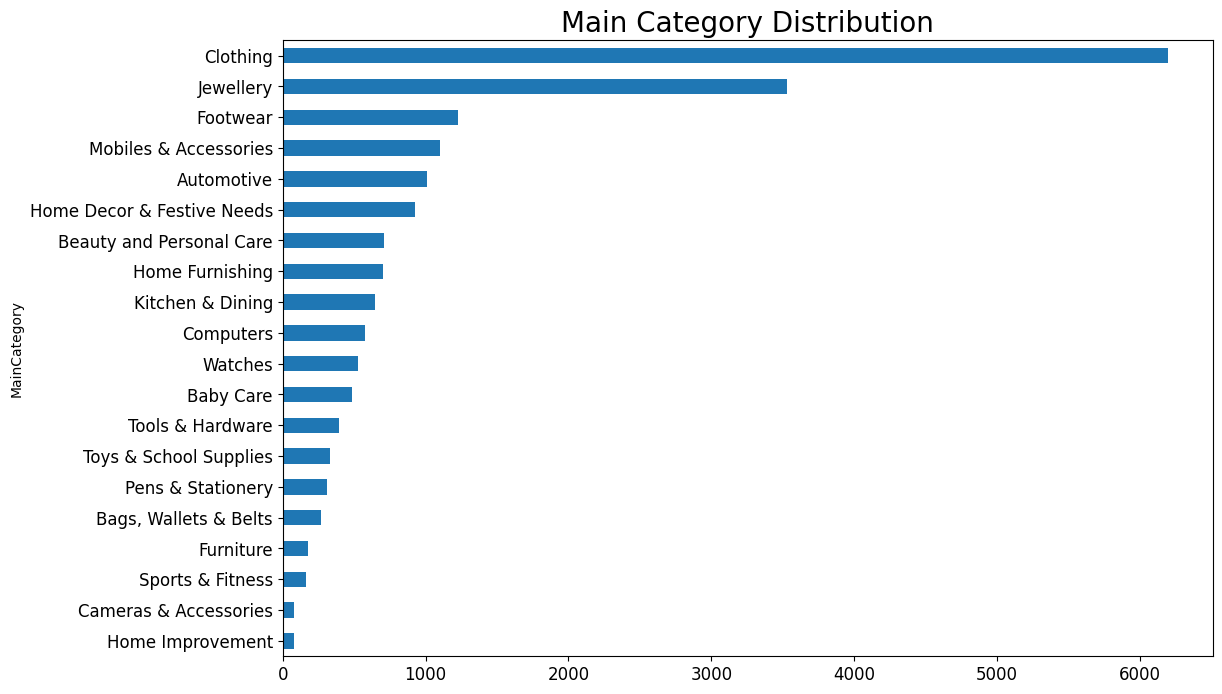

Top ten main categories by sales:

MainCategory
Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 8))

#Generate a horizontal bar plot for the top 20 main categories, sorted in ascending order
df['MainCategory'].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.title('Main Category Distribution', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Display the top ten main categories based on sales
print('Top ten main categories by sales:\n')
print(df['MainCategory'].value_counts().nlargest(10))


The primary category are Clothing, Jewelry, Shoes, Electronics, and Automotive!

####Doing same with secodary_category:-

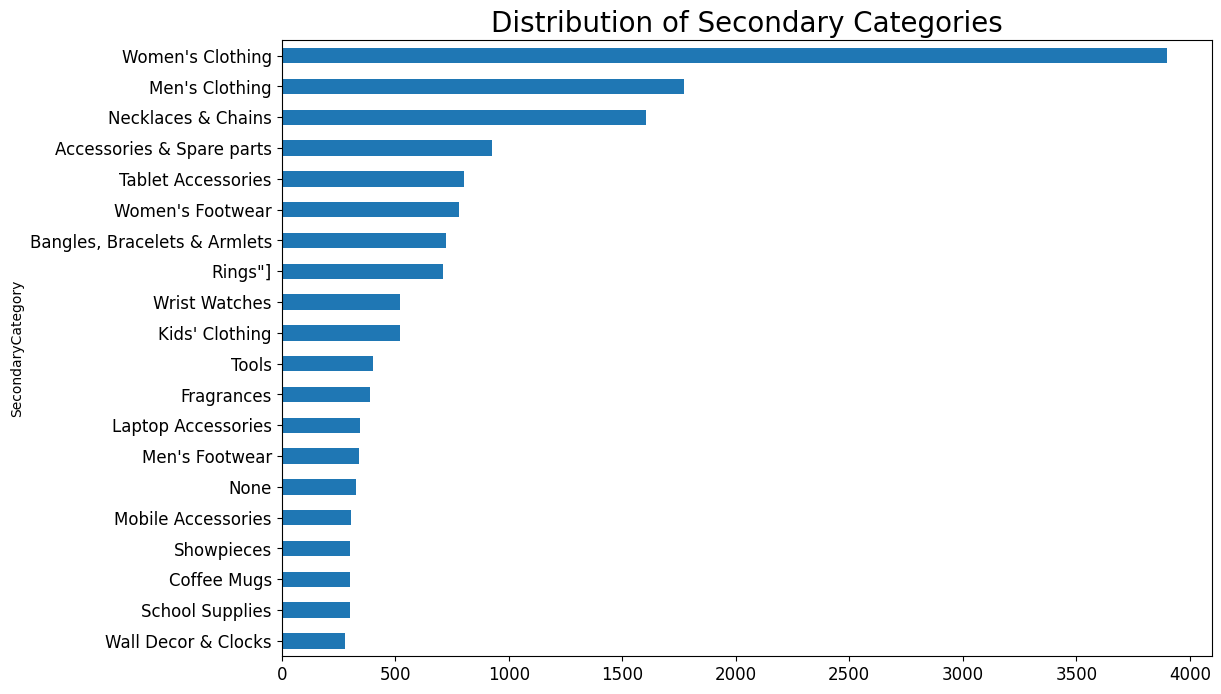

Top Ten Secondary Categories by Sales:

SecondaryCategory
Women's Clothing                3901
Men's Clothing                  1773
Necklaces & Chains              1606
Accessories & Spare parts        925
Tablet Accessories               801
Women's Footwear                 781
Bangles, Bracelets & Armlets     724
Rings"]                          710
Wrist Watches                    523
Kids' Clothing                   520
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 8))

#Plot a horizontal bar chart for the top 20 secondary categories, sorted in ascending order
df['SecondaryCategory'].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Distribution of Secondary Categories', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Print the top ten secondary categories based on sales
print('Top Ten Secondary Categories by Sales:\n')
print(df['SecondaryCategory'].value_counts().nlargest(10))


Women's clothing sales exceed those of Men's clothing by more than two fold. This indicates a significant female user base on Flipkart, despite the absence of a gender column. Moreover, notable categories such as 'Necklaces,' 'Women's Footwear,' 'Rings,' and 'Kid's clothing' further emphasize this trend.

###Doing same with tertiary category:-

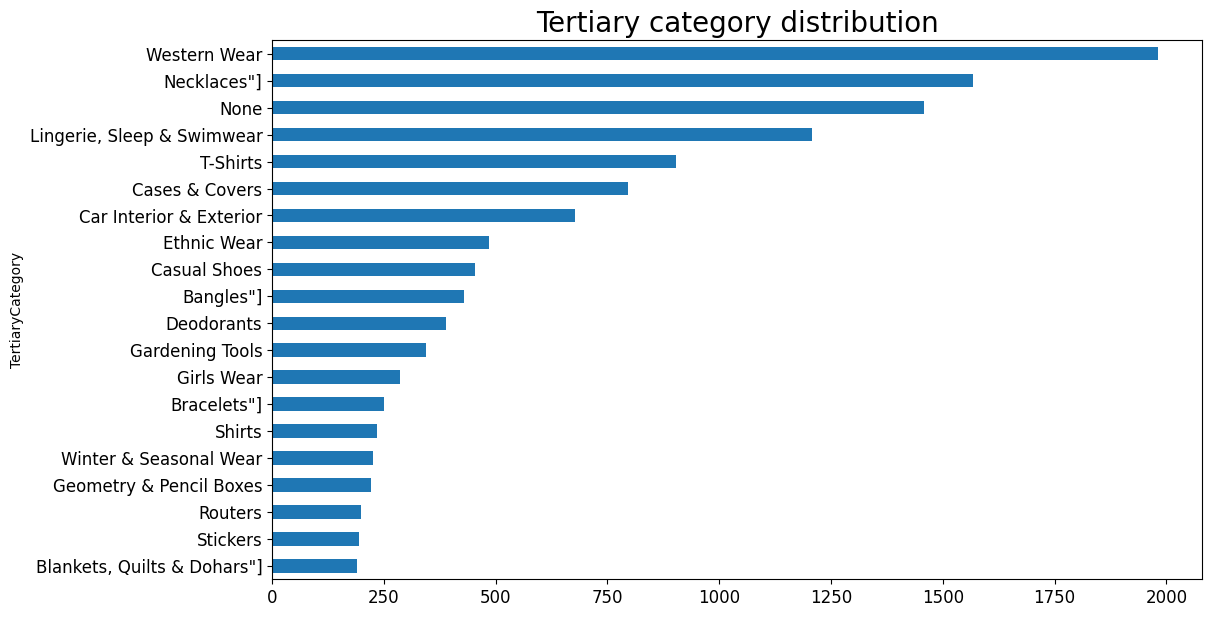

Top ten tertiary categories by sales:

TertiaryCategory
Western Wear                  1981
Necklaces"]                   1567
None                          1457
Lingerie, Sleep & Swimwear    1208
T-Shirts                       903
Cases & Covers                 796
Car Interior & Exterior        677
Ethnic Wear                    485
Casual Shoes                   454
Bangles"]                      430
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 7))

#generate a horizontal bar chart for the top 20 tertiary categories, sorted in ascending order
df['TertiaryCategory'].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary category distribution', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

#print the top ten tertiary categories based on sales
print('Top ten tertiary categories by sales:\n')
print(df['TertiaryCategory'].value_counts().nlargest(10))


The top four tertiary categories by sales show that Western Wear leads with 1,981 units sold, followed by Necklaces at 1,567 units. The None category has 1,457 units, indicating potential data issues. Lingerie, Sleep & Swimwear sold 1,208 units, highlighting strong interest in intimate apparel.

###Doing same with Quaternary Category:-

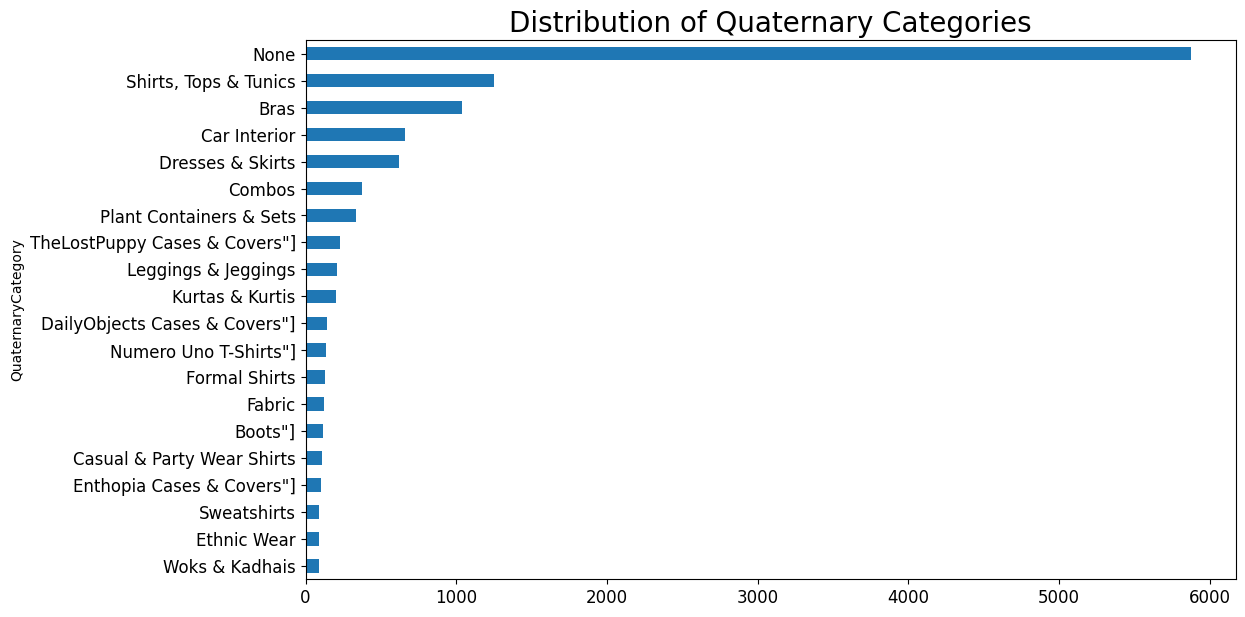

Top Ten Quaternary Categories by Sales:

QuaternaryCategory
None                             5876
Shirts, Tops & Tunics            1249
Bras                             1036
Car Interior                      659
Dresses & Skirts                  620
Combos                            375
Plant Containers & Sets           333
TheLostPuppy Cases & Covers"]     229
Leggings & Jeggings               209
Kurtas & Kurtis                   202
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 7))

#create a horizontal bar chart for the top 20 quaternary categories, sorted in ascending order
df['QuaternaryCategory'].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Distribution of Quaternary Categories', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

#print the top ten quaternary categories based on sales
print('Top Ten Quaternary Categories by Sales:\n')
print(df['QuaternaryCategory'].value_counts().nlargest(10))


what is the lowest price item in Flipkart during this time?

In [ ]:
df['retail_price'].min()

35.0

In [ ]:
df[df['retail_price']==35.0]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,year,month,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
10554,aa68675f50a0551b8dadb954017a50a1,2016-04-15 20:20:45+00:00,http://www.flipkart.com/geol-wooden-wet-dry-br...,Geol Wooden Wet and Dry Broom,"[""Kitchen & Dining >> Housekeeping & Laundry >...",BMBEHPAGGDSSYMUZ,35.0,35.0,"[""http://img5a.flixcart.com/image/broom-brush/...",False,...,No rating available,No rating available,Geol,"{""product_specification""=>[{""key""=>""Brand"", ""v...",2016,April,Kitchen & Dining,Housekeeping & Laundry,Home Cleaning,Brooms & Brushes


what is the most expensive item in Flipkart during this time?

In [ ]:
df['retail_price'].max()

571230.0

In [ ]:
df[df['retail_price']==571230.000000]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,year,month,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
116,329c5f4d7aced63e1ce3e88f41d5e7e6,2015-12-04 07:25:36+00:00,http://www.flipkart.com/breitling-ab011010-bb0...,Breitling AB011010/BB08 131S Chronomat 44 Anal...,"[""Watches >> Wrist Watches >> Breitling Wrist ...",WATE9DX9E4YSRJSY,571230.0,571230.0,"[""http://img5a.flixcart.com/image/watch/j/s/y/...",False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",2015,December,Watches,Wrist Watches,"Breitling Wrist Watches""]",None


##**Discounted Sales Analysis**

####Creating discount percentage column:-

In [ ]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'year', 'month',
       'MainCategory', 'SecondaryCategory', 'TertiaryCategory',
       'QuaternaryCategory'],
      dtype='object')

In [ ]:
df['discount_%'] = round(((df['retail_price'] - df['discounted_price']) / df['retail_price'] * 100),1)
df[['product_name','retail_price','discounted_price','discount_%']].head()

,product_name,retail_price,discounted_price,discount_%
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,62.1
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,29.6
2,AW Bellies,999.0,499.0,50.1
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,61.8
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,4.5


we have created new dataframe that contains product name, retail_price,discount_price, discount_percentage and count of each project.....

In [ ]:
df['MainCategory'].value_counts()

,count
MainCategory,
Clothing,6198
Jewellery,3531
Footwear,1227
Mobiles & Accessories,1099
Automotive,1012
...,...
"Mast & Harbour Gold Synthetic Clutch""",1
"Asics Gel-Cumulus 17 Running Shoes""",1
"Glacier Running Shoes""",1


In [ ]:
MainCategoryDiscount = pd.DataFrame(df.groupby('MainCategory').agg({
    'discount_%':[(np.mean)],
    'MainCategory':['count']
}))

SecondaryCategoryDiscount = pd.DataFrame(df.groupby('SecondaryCategory').agg({
    'discount_%':[np.mean],
    'SecondaryCategory':['count']
}))

TertiaryCategoryDiscount = pd.DataFrame(df.groupby('TertiaryCategory').agg({
    'discount_%':[np.mean],
    'TertiaryCategory':['count']
}))

QuaternaryCategoryDiscount = pd.DataFrame(df.groupby('QuaternaryCategory').agg({
    'discount_%':[np.mean],
    'QuaternaryCategory':['count']
}))

<ipython-input-33-cd8a1d359c67>:1: FutureWarning: The provided callable <function mean at 0x7bf4334e8280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  MainCategoryDiscount = pd.DataFrame(df.groupby('MainCategory').agg({
<ipython-input-33-cd8a1d359c67>:6: FutureWarning: The provided callable <function mean at 0x7bf4334e8280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  SecondaryCategoryDiscount = pd.DataFrame(df.groupby('SecondaryCategory').agg({
<ipython-input-33-cd8a1d359c67>:11: FutureWarning: The provided callable <function mean at 0x7bf4334e8280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  TertiaryCat

In [ ]:
MainCategoryDiscount.head()

,discount_%,MainCategory
,mean,count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",10.0,2
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1


Third, we are going to combine the levels of the columns for visualization purposes.

In [ ]:
MainCategoryDiscount.columns = ['_'.join(col) for col in MainCategoryDiscount.columns]
SecondaryCategoryDiscount.columns = ['_'.join(col) for col in SecondaryCategoryDiscount.columns]
TertiaryCategoryDiscount.columns = ['_'.join(col) for col in TertiaryCategoryDiscount.columns]
QuaternaryCategoryDiscount.columns = ['_'.join(col) for col in QuaternaryCategoryDiscount.columns]

In [ ]:
 MainCategoryDiscount.head()

,discount_%_mean,MainCategory_count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",10.0,2
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1


In [ ]:
MainCategoryDiscount.columns

Index(['discount_%_mean', 'MainCategory_count'], dtype='object')

In [ ]:
MainCategoryDiscount = MainCategoryDiscount.sort_values(by=['MainCategory_count'],ascending=False)[:20]
SecondaryCategoryDiscount = SecondaryCategoryDiscount.sort_values(by=['SecondaryCategory_count'],ascending=False)[:20]
TertiaryCategoryDiscount = TertiaryCategoryDiscount.sort_values(by=['TertiaryCategory_count'],ascending=False)[:20]
QuaternaryCategoryDiscount = QuaternaryCategoryDiscount.sort_values(by=['QuaternaryCategory_count'],ascending=False)[:20]

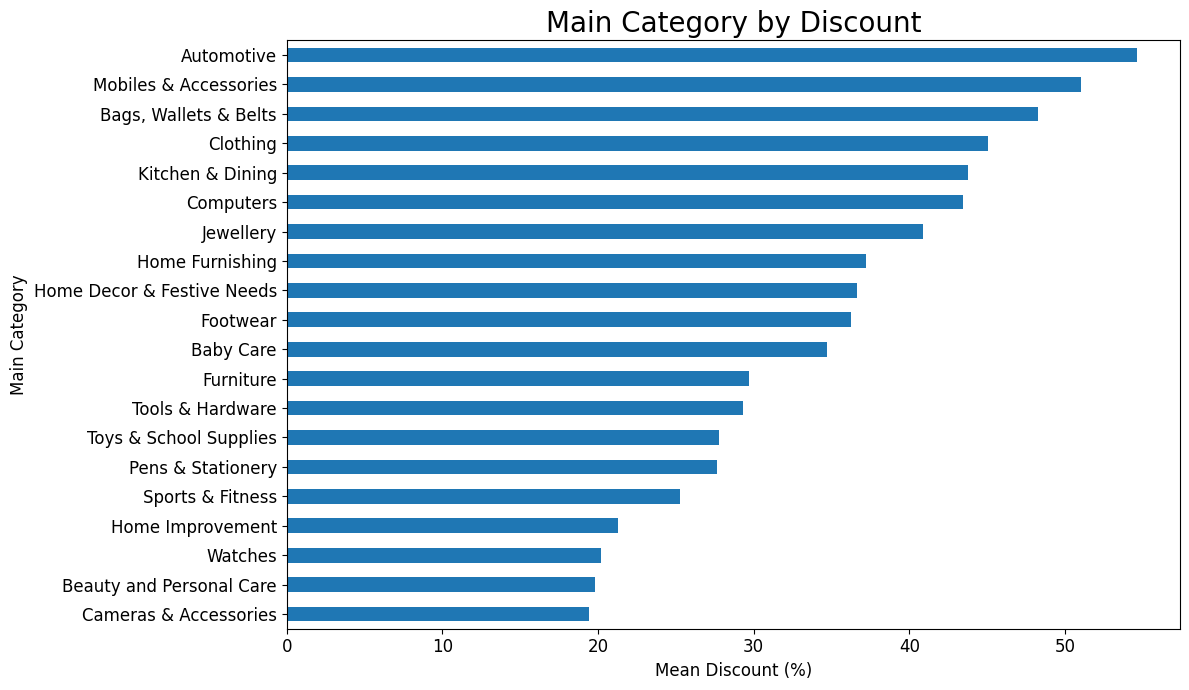

Main Category by Discount (Percentage)

MainCategory
Automotive               54.649901
Mobiles & Accessories    51.001185
Bags, Wallets & Belts    48.271591
Clothing                 45.071301
Kitchen & Dining         43.769612
Computers                43.464223
Jewellery                40.891198
Home Furnishing          37.218143
Name: discount_%_mean, dtype: float64


In [ ]:
# Create a horizontal bar chart for the mean discounts in main categories
plt.figure(figsize=(12, 7))
sorted_discounts = MainCategoryDiscount['discount_%_mean'].sort_values(ascending=True)
sorted_discounts.plot(kind='barh')
plt.title('Main Category by Discount', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Mean Discount (%)', fontsize=12)
plt.ylabel('Main Category', fontsize=12)
plt.tight_layout()
plt.show()

# Display the top 8 categories by discount percentage
print('Main Category by Discount (Percentage)\n')
top_discounts = sorted_discounts.sort_values(ascending=False)[:8]
print(top_discounts)


Automotive, clothing, and electronics were among the categories with the highest discounts.

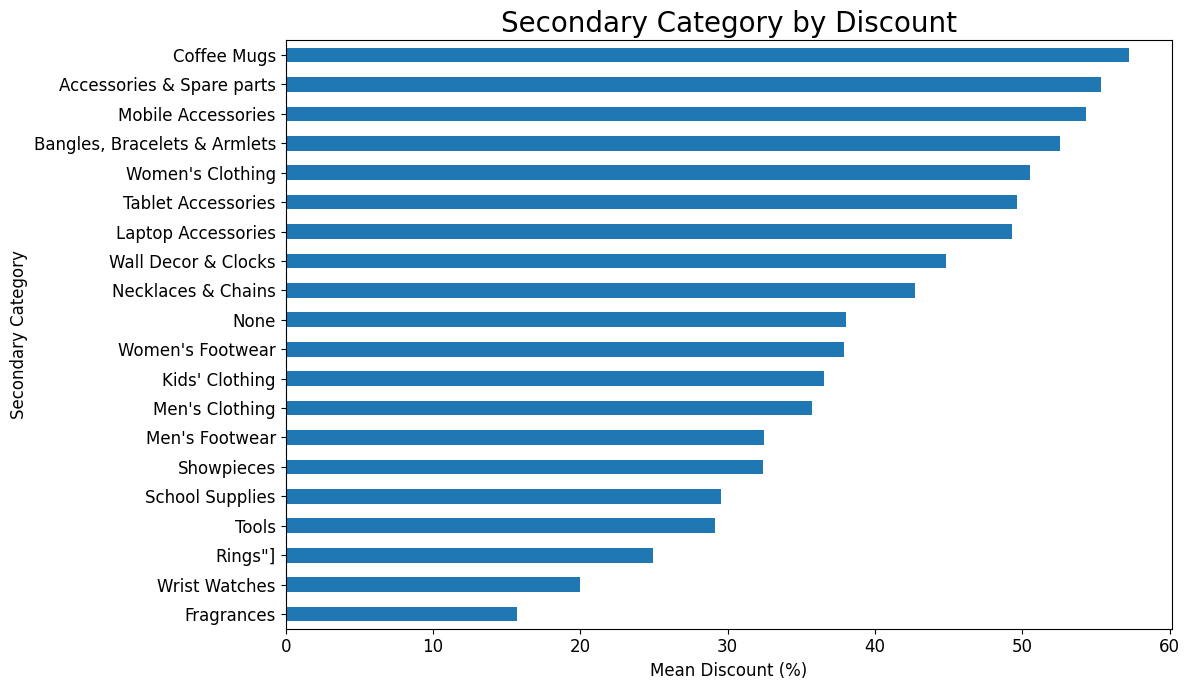

Secondary Category by Discount (Percentage)

SecondaryCategory
Coffee Mugs                     57.274172
Accessories & Spare parts       55.370314
Mobile Accessories              54.318421
Bangles, Bracelets & Armlets    52.560111
Women's Clothing                50.500619
Tablet Accessories              49.673217
Laptop Accessories              49.320354
Wall Decor & Clocks             44.833213
Name: discount_%_mean, dtype: float64


In [ ]:
plt.figure(figsize=(12, 7))

# Sort the discounts and plot
sorted_secondary_discounts = SecondaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True)
sorted_secondary_discounts.plot(kind='barh')
plt.title('Secondary Category by Discount', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Mean Discount (%)', fontsize=12)
plt.ylabel('Secondary Category', fontsize=12)
plt.tight_layout()
plt.show()

# Print the top 8 secondary categories by discount percentage
print('Secondary Category by Discount (Percentage)\n')
top_secondary_discounts = sorted_secondary_discounts.sort_values(ascending=False)[:8]
print(top_secondary_discounts)


For the secondary category, electronics and accessories appeared again, along with some clothing, spare parts, and jewelry. Interestingly, coffee mugs were absent from the list.

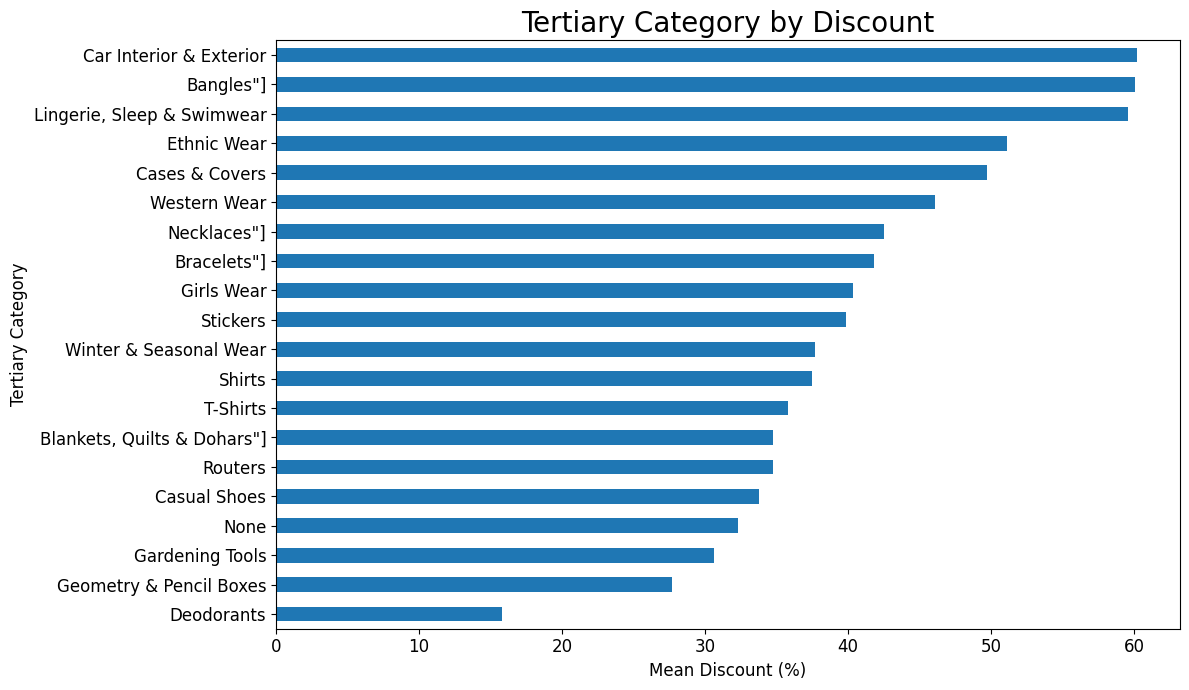

Tertiary Category by Discount (Percentage)

TertiaryCategory
Car Interior & Exterior       60.212741
Bangles"]                     60.057809
Lingerie, Sleep & Swimwear    59.606716
Ethnic Wear                   51.112810
Cases & Covers                49.741058
Western Wear                  46.082203
Necklaces"]                   42.543918
Bracelets"]                   41.830400
Name: discount_%_mean, dtype: float64


In [ ]:
plt.figure(figsize=(12, 7))

# Sort the discounts and plot
sorted_tertiary_discounts = TertiaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True)
sorted_tertiary_discounts.plot(kind='barh')
plt.title('Tertiary Category by Discount', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Mean Discount (%)', fontsize=12)
plt.ylabel('Tertiary Category', fontsize=12)
plt.tight_layout()
plt.show()

# Display the top 8 tertiary categories by discount percentage
print('Tertiary Category by Discount (Percentage)\n')
top_tertiary_discounts = sorted_tertiary_discounts.sort_values(ascending=False)[:8]
print(top_tertiary_discounts)



Automotive parts on top again, followed by mostly jewellery and clothing. None is present

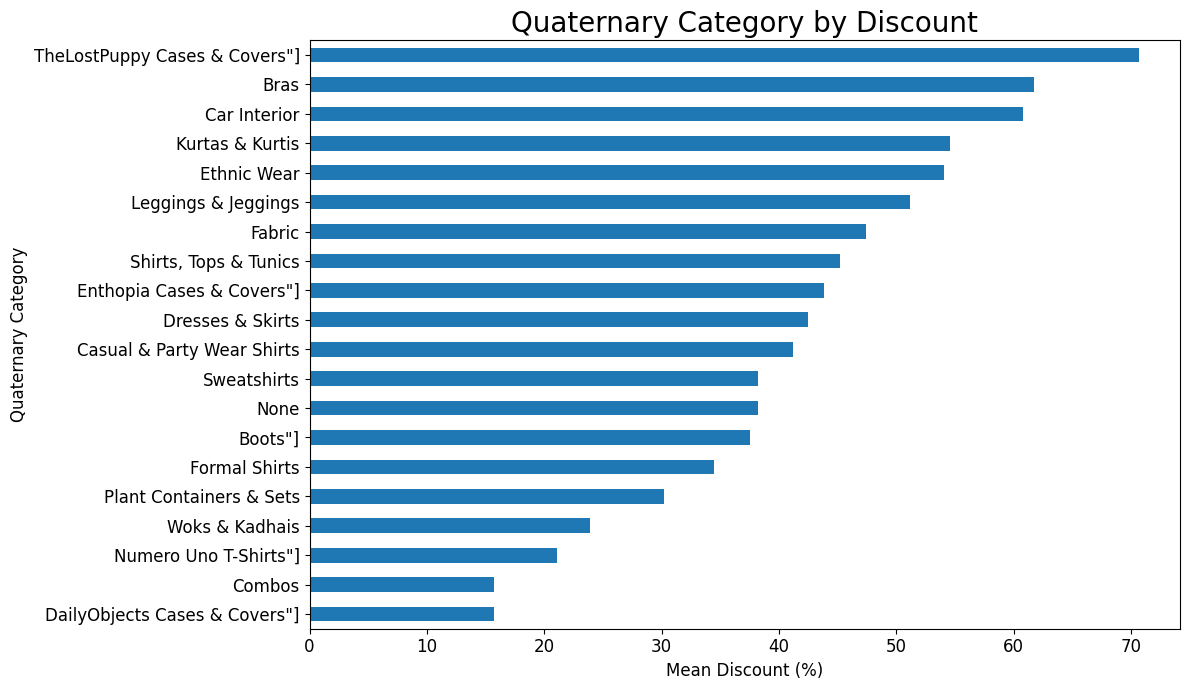

Quaternary Category by Discount (Percentage)

QuaternaryCategory
TheLostPuppy Cases & Covers"]    70.651528
Bras                             61.739034
Car Interior                     60.784170
Kurtas & Kurtis                  54.601485
Ethnic Wear                      54.036667
Leggings & Jeggings              51.212019
Fabric                           47.405738
Shirts, Tops & Tunics            45.196107
Name: discount_%_mean, dtype: float64


In [ ]:
plt.figure(figsize=(12, 7))

# Sort the discounts for quaternary categories and plot
sorted_quaternary_discounts = QuaternaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True)
sorted_quaternary_discounts.plot(kind='barh')
plt.title('Quaternary Category by Discount', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Mean Discount (%)', fontsize=12)
plt.ylabel('Quaternary Category', fontsize=12)
plt.tight_layout()
plt.show()

# Print the top 8 quaternary categories by discount percentage
print('Quaternary Category by Discount (Percentage)\n')
top_quaternary_discounts = sorted_quaternary_discounts.sort_values(ascending=False)[:8]
print(top_quaternary_discounts)


The Quaternary category is dominated by mostly clothing, with come automotive and electric categories.